In [1]:
%matplotlib inline


### This is our original image

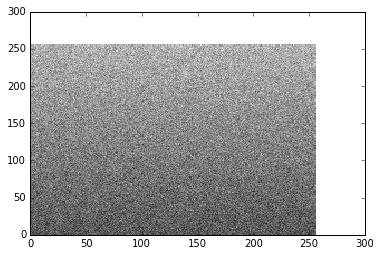

In [46]:
dimOrig =np.array([256,256])
img = np.outer(np.arange(dimOrig[0]),np.ones(dimOrig[1]))/64.
img+= np.reshape(np.random.randn(np.prod(dimOrig)),dimOrig)
pcolormesh(img,cmap='gray')


### Here we create randomized images that are 1/4 of the original size (1/2 in each dimension), which will be comprised of subimages that are 64x64

In [47]:

dimSubImg = np.array([64,64])
subDiv = dimOrig/dimSubImg

# create list of subimages from which we will draw random samples 
subImgs = []
for i in range(subDiv[0]):
    for j in range(subDiv[0]):
      damin=[i*dimSubImg[0]  ,j*dimSubImg[1]]
      damax=[(i+1)*dimSubImg[0], (j+1)*dimSubImg[1]]
      #print damin, damax
      subImg = img[damin[0]:damax[0],damin[1]:damax[1]]  
      subImgs.append(subImg)  

Example random image
[12 14 12  5]


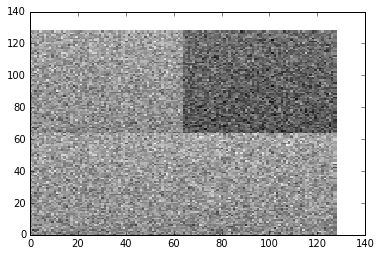

In [98]:
# create a random bootstrap image
dimBootstrap = dimOrig/2

def MakeBootstrap(
  dimBootstrap,
  dimSubImg,
  subImgs,
  verbose=True
):
    subDiv = dimBootstrap/dimSubImg

    nRandomDraws = np.prod(subDiv)
    from random import randint
    randInts = np.asarray( [randint(0,len(subImgs)-1) for p in range(0,nRandomDraws)],dtype=int )
    
    #randomDraws = subImgs[ randInts ]

    bootStrapImg = np.zeros(dimBootstrap)
    ctr=0
    for i in range(subDiv[0]):
        for j in range(subDiv[1]):
          damin=[i*dimSubImg[0]  ,j*dimSubImg[1]]
          damax=[(i+1)*dimSubImg[0], (j+1)*dimSubImg[1]]
          #print damin, damax
          #subImg = img[damin[0]:damax[0],damin[1]:damax[1]]  
          #print ctr  
          bootStrapImg[damin[0]:damax[0],damin[1]:damax[1]]  = subImgs[ randInts[ctr] ]
          ctr+=1 
    if verbose:    
      plt.figure()  
      print randInts   
      pcolormesh(bootStrapImg,cmap='gray')   
    return bootStrapImg       


print "Example random image" 
bootStrap = MakeBootstrap(dimBootstrap,dimSubImg,subImgs)

### Do bootstrapping 

In [96]:
numBootstrapTests = 100

def yourStatistic(data):
    return np.mean(data)

yourStatistics=np.zeros(numBootstrapTests)
for i in range(numBootstrapTests):
    bootStrap = MakeBootstrap(dimBootstrap,dimSubImg,subImgs,verbose=False)
    # put in your mf tool
    yourStatistics[i]=yourStatistic(bootStrap)





In [97]:
print "Bootstrap mean: %f" % (np.mean(yourStatistics))
print "Bootstrap stddev: %f" % (np.std(yourStatistics))
print "Bootstrap stderr: %f" % (np.std(yourStatistics)/np.sqrt(numBootstrapTests))

Bootstrap mean: 2.065429
Bootstrap stddev: 0.500505
Bootstrap stderr: 0.050050
